In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('../../lib/')

import matplotlib.pyplot as plt
from frustration_traditional import *

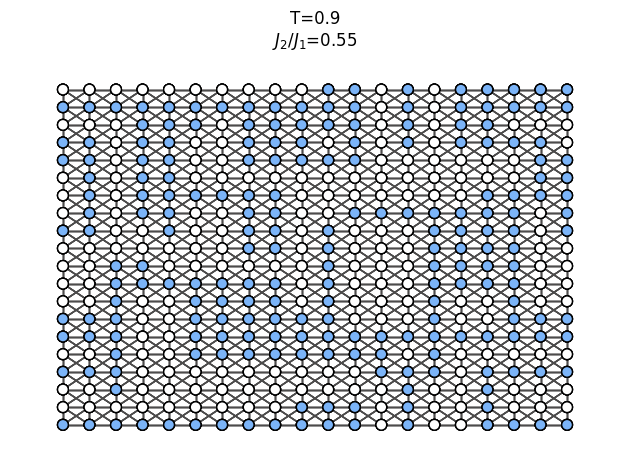

In [2]:
L = 20
T = 0.9
ratio = 0.45

for ratio in [0.3, 0.6, 0.45, 0.55]:
    vals, config = thermalization_config(L, T, ratio, 0, 10)
    plot_state(config, T, ratio, 1)

In [4]:
N = 1000
ratios = np.linspace(0, 1, N)
Ts = np.linspace(0.1, 3.5, N)

try:
    res = pd.read_csv("../../Results/Ising_Frustrated/Classical/res_1000x1000_10err.gzip", compression='gzip')
except:
    res = transition(L, Ts, ratios, err_runs=10, workers=12)

In [5]:
res

,T,ratio,M,M_std,X,X_std,U
0,0.1,0.000000,1.000000,0.000000,0.000000,0.000000,0.666667
1,0.1,0.001001,1.000000,0.000000,0.000000,0.000000,0.666667
2,0.1,0.002002,1.000000,0.000000,0.000000,0.000000,0.666667
3,0.1,0.003003,1.000000,0.000000,0.000000,0.000000,0.666667
4,0.1,0.004004,1.000000,0.000000,0.000000,0.000000,0.666667
...,...,...,...,...,...,...,...
999995,3.5,0.995996,0.032931,0.000799,0.071967,0.003067,-0.020764
999996,3.5,0.996997,0.032926,0.000633,0.071103,0.003264,0.006145
999997,3.5,0.997998,0.032830,0.000418,0.071355,0.002883,-0.016893
999998,3.5,0.998999,0.032469,0.000649,0.070396,0.002435,-0.010207


In [10]:
Ts[1]

0.10340340340340341

In [13]:
res['T'].unique()

array([0.1       , 0.1034034 , 0.10680681, 0.11021021, 0.11361361,
       0.11701702, 0.12042042, 0.12382382, 0.12722723, 0.13063063,
       0.13403403, 0.13743744, 0.14084084, 0.14424424, 0.14764765,
       0.15105105, 0.15445445, 0.15785786, 0.16126126, 0.16466466,
       0.16806807, 0.17147147, 0.17487487, 0.17827828, 0.18168168,
       0.18508509, 0.18848849, 0.19189189, 0.1952953 , 0.1986987 ,
       0.2021021 , 0.20550551, 0.20890891, 0.21231231, 0.21571572,
       0.21911912, 0.22252252, 0.22592593, 0.22932933, 0.23273273,
       0.23613614, 0.23953954, 0.24294294, 0.24634635, 0.24974975,
       0.25315315, 0.25655656, 0.25995996, 0.26336336, 0.26676677,
       0.27017017, 0.27357357, 0.27697698, 0.28038038, 0.28378378,
       0.28718719, 0.29059059, 0.29399399, 0.2973974 , 0.3008008 ,
       0.3042042 , 0.30760761, 0.31101101, 0.31441441, 0.31781782,
       0.32122122, 0.32462462, 0.32802803, 0.33143143, 0.33483483,
       0.33823824, 0.34164164, 0.34504505, 0.34844845, 0.35185

In [14]:
U_matrix = np.zeros((N, N))

for i, T in enumerate(res['T'].unique()):
    U_matrix[i, :] = res[res['T'] == T]['U']

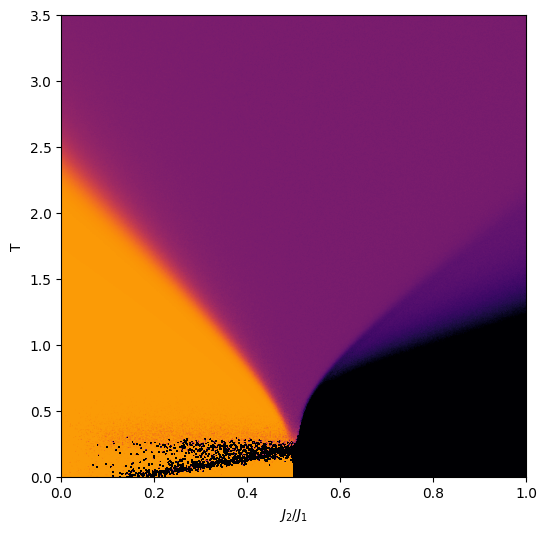

In [53]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(U_matrix[::-1, :], vmax=1, vmin=-0.5, extent=[0,1,0,3.5], aspect='auto', cmap='inferno')#
ax.set_xlabel(r'$J_2$/$J_1$')
ax.set_ylabel("T")
#plt.savefig("../../Results/Ising_Frustrated/Classical/Phase_Diagram.png", transparent=True, dpi=600)